In [7]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb
import fix_yahoo_finance as yf
yf.pdr_override()
import numpy as np
import datetime

In [48]:
start = datetime.datetime(2014, 1, 1)
start2 = datetime.datetime(2014,9,19)
end = datetime.datetime(2018, 1, 1)
alibaba = data.get_data_yahoo('BABA', start, end)
amazon = data.get_data_yahoo('AMZN',start2,end)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [51]:
alibaba.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-19,92.699997,99.699997,89.949997,93.889999,93.889999,271879400
2014-09-22,92.699997,92.949997,89.500000,89.889999,89.889999,66657800
2014-09-23,88.940002,90.480003,86.620003,87.169998,87.169998,39009800
2014-09-24,88.470001,90.570000,87.220001,90.570000,90.570000,32088000
2014-09-25,91.089996,91.500000,88.500000,88.919998,88.919998,28598000


In [18]:
alibaba.shape

(827, 6)

In [20]:
alibaba.describe()

,Open,High,Low,Close,Adj Close,Volume
count,827.000000,827.000000,827.000000,827.000000,827.000000,8.270000e+02
mean,102.598771,103.712632,101.294230,102.502829,102.502829,1.694971e+07
std,33.112298,33.281232,32.721947,33.012790,33.012790,1.406091e+07
min,57.299999,58.650002,57.200001,57.389999,57.389999,3.775300e+06
25%,80.564999,81.500000,79.435997,80.570000,80.570000,1.010995e+07
50%,90.709999,91.650002,89.500000,90.570000,90.570000,1.357070e+07
75%,108.924999,110.244999,107.500000,109.004998,109.004998,1.945430e+07
max,191.539993,191.750000,189.369995,191.190002,191.190002,2.718794e+08


# 历史趋势分析

In [27]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
alibaba.to_csv('BABA.csv')
amazon.to_csv('AMZN.csv')

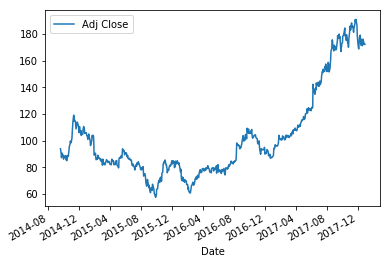

In [45]:
alibaba['Adj Close'].plot(legend=True)

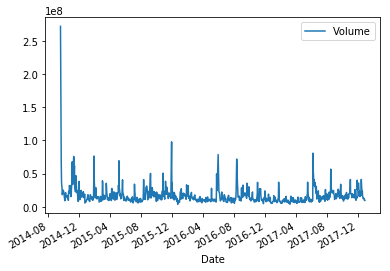

In [29]:
alibaba['Volume'].plot(legend=True)

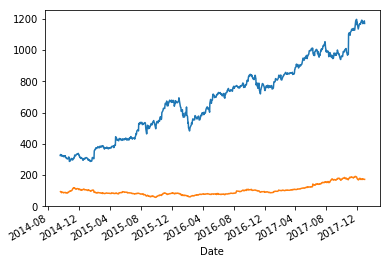

In [50]:
amazon['Adj Close'].plot()
alibaba['Adj Close'].plot()

In [52]:
alibaba['high-low'] = alibaba['High'] - alibaba['Low']
alibaba.head()

,Open,High,Low,Close,Adj Close,Volume,high-low
Date,,,,,,,
2014-09-19,92.699997,99.699997,89.949997,93.889999,93.889999,271879400,9.750000
2014-09-22,92.699997,92.949997,89.500000,89.889999,89.889999,66657800,3.449997
2014-09-23,88.940002,90.480003,86.620003,87.169998,87.169998,39009800,3.860000
2014-09-24,88.470001,90.570000,87.220001,90.570000,90.570000,32088000,3.349999
2014-09-25,91.089996,91.500000,88.500000,88.919998,88.919998,28598000,3.000000


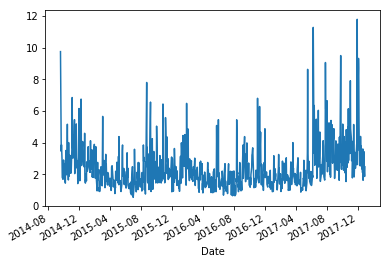

In [53]:
alibaba['high-low'].plot()

In [63]:
# daily return
alibaba['daily-return'] = alibaba['Adj Close'].pct_change()

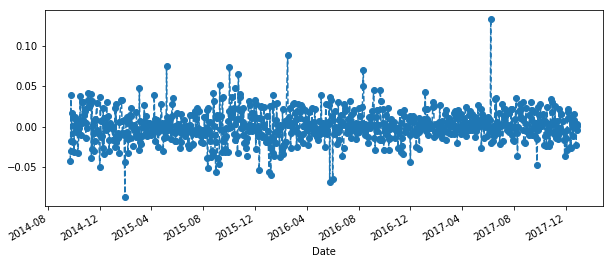

In [66]:
alibaba['daily-return'].plot(figsize=(10,4),linestyle='--',marker='o')

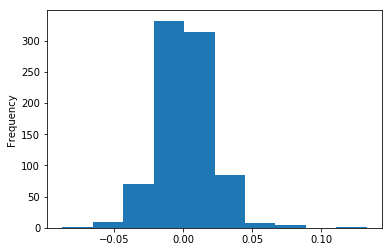

In [67]:
alibaba['daily-return'].plot(kind='hist')

c:\users\dcd15\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


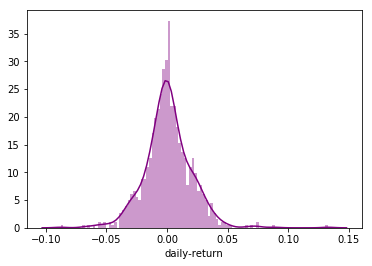

In [70]:
sns.distplot(alibaba['daily-return'].dropna(),bins=100,color='purple')